# 朴素贝叶斯

## 【关键词】

- 朴素：独立性假设
- 贝叶斯公式

优点：
- 朴素贝叶斯模型发源于古典数学理论，有着坚实的数学基础，以及稳定的分类效率；
- 对小规模的数据表现很好；
- 能处理多分类任务，适合增量式训练；
- 对缺失数据不太敏感，算法也比较简单，常用于文本分类

缺点：
- 只能用于分类问题
- 需要计算先验概率；
- 分类决策存在错误率；
- 对输入数据的表达形式很敏感

## 一、朴素贝叶斯原理

朴素贝叶斯算法是一个典型的统计学习方法，主要理论基础就是一个贝叶斯公式，贝叶斯公式的基本定义如下：

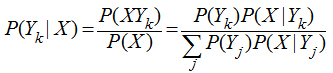

这个公式虽然看上去简单，但它却能总结历史，预知未来：
- 公式的右边是总结历史
- 公式的左边是预知未来

如果把Y看成类别，X看成特征，P(Yk|X)就是在已知特征X的情况下求Yk类别的概率，而对P(Yk|X)的计算又全部转化到类别Yk的特征分布上来。

举个例子，大学的时候，某男生经常去图书室晚自习，发现他喜欢的那个女生也常去那个自习室，心中窃喜，于是每天买点好吃点在那个自习室蹲点等她来，可是人家女生不一定每天都来，眼看天气渐渐炎热，图书馆又不开空调，如果那个女生没有去自修室，该男生也就不去，每次男生鼓足勇气说：“嘿，你明天还来不？”,“啊，不知道，看情况”。

然后该男生每天就把她去自习室与否以及一些其他情况做一下记录，用Y表示该女生是否去自习室，即Y={去，不去}，X是跟去自修室有关联的一系列条件，比如当天上了哪门主课，蹲点统计了一段时间后，该男生打算今天不再蹲点，而是先预测一下她会不会去，现在已经知道了今天上了常微分方法这么主课，于是计算P(Y=去|常微分方程)与P(Y=不去|常微分方程)，看哪个概率大，如果P(Y=去|常微分方程) >P(Y=不去|常微分方程)，那这个男生不管多热都屁颠屁颠去自习室了，否则不就去自习室受罪了。P(Y=去|常微分方程)的计算可以转为计算以前她去的情况下，那天主课是常微分的概率P(常微分方程|Y=去)，注意公式右边的分母对每个类别（去/不去）都是一样的，所以计算的时候忽略掉分母，这样虽然得到的概率值已经不再是0~1之间，但是通过比较大小还是能选择类别。

后来他发现还有一些其他条件可以挖，比如当天星期几、当天的天气，以及上一次与她在自修室的气氛，统计了一段时间后，该男子一计算，发现不好算了，因为总结历史的公式：

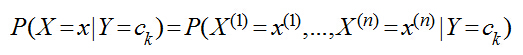

这里n=3，x(1)表示主课，x(2)表示天气，x(3)表示星期几，x(4)表示气氛，Y仍然是{去，不去}，现在主课有8门，天气有晴、雨、阴三种、气氛有A+,A,B+,B，C五种，那么总共需要估计的参数有8×3×7×5×2=1680个，每天只能收集到一条数据，那么等凑齐1680条数据，大学都毕业了，男生大呼不妙，于是做了一个独立性假设，假设这些影响她去自习室的原因是独立互不相关的，于是：

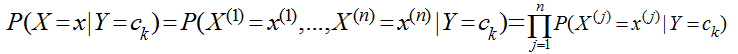

有了这个独立假设后，需要估计的参数就变为，(8+3+7+5)×2 = 46个了，而且每天收集的一条数据，可以提供4个参数，这样该男生就预测越来越准了。


朴素的概念：独立性假设，假设各个特征之间是独立不相关的。

### 朴素贝叶斯分类器

讲了上面的小故事，我们来朴素贝叶斯分类器的表示形式：

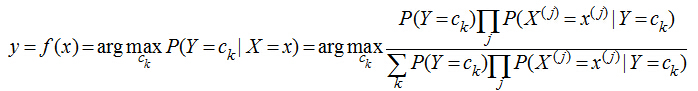

当特征为为x时，计算所有类别的条件概率，选取条件概率最大的类别作为待分类的类别。由于上公式的分母对每个类别都是一样的，因此计算时可以不考虑分母，即

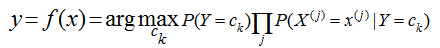

朴素贝叶斯的朴素体现在其对各个条件的独立性假设上，加上独立假设后，大大减少了参数假设空间。

### 在文本分类上的应用

文本分类的应用很多，比如垃圾邮件和垃圾短信的过滤就是一个2分类问题，新闻分类、文本情感分析等都可以看成是文本分类问题，分类问题由两步组成：训练和预测，要建立一个分类模型，至少需要有一个训练数据集。贝叶斯模型可以很自然地应用到文本分类上：现在有一篇文档d（Document），判断它属于哪个类别ck，只需要计算文档d属于哪一个类别的概率最大：

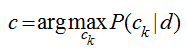

在分类问题中，我们并不是把所有的特征都用上，对一篇文档d，我们只用其中的部分特征词项t1,t2,...,tnd（nd表示d中的总词条数目），因为很多词项对分类是没有价值的，比如一些停用词“的,是,在”在每个类别中都会出现，这个词项还会模糊分类的决策面，关于特征词的选取，我的这篇文章有介绍。用特征词项表示文档后，计算文档d的类别转化为：

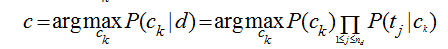

注意P(Ck|d)只是正比于后面那部分公式，完整的计算还有一个分母，但我们前面讨论了，对每个类别而已分母都是一样的，于是在我们只需要计算分子就能够进行分类了。实际的计算过程中，多个概率值P(tj|ck)的连乘很容易下溢出为0，因此转化为对数计算，连乘就变成了累加：

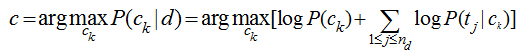

我们只需要从训练数据集中，计算每一个类别的出现概率P(ck)和每一个类别中各个特征词项的概率P(tj|ck)，而这些概率值的计算都采用最大似然估计，说到底*就是统计每个词在各个类别中出现的次数和各个类别的文档的数目*：

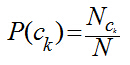
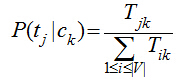

导包

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

## 二、3种贝叶斯模型

### 1、高斯分布朴素贝叶斯
- sklearn.naive_bayes.GaussianNB

In [2]:
from sklearn.naive_bayes import GaussianNB

高斯分布就是正态分布

【用途】用于一般分类问题

使用自带的鸢尾花数据
- load_iris()
- 生成在每个特征的[min, max]区间生成300点，通过meshgrid()、ravel()和np.c_[]合并成X_test测试数据

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
f1 = np.linspace(
    iris.data[:, 2].min(),
    iris.data[:, 2].max(),
    num=300
)

f2 = np.linspace(
    iris.data[:, 3].min(),
    iris.data[:, 3].max(),
    num=300
)

f1, f2 = np.meshgrid(f1, f2)
X_test = np.c_[f1.ravel(), f2.ravel()]  # 测试数据

In [6]:
# 创建高斯分布的朴素贝叶斯模型
gaussian = GaussianNB()

In [10]:
# 训练和预测
gaussian.fit(iris.data[:, 2:], iris.target)

GaussianNB(priors=None)

In [11]:
y_ = gaussian.predict(X_test)

以散点图比较样本与预测数据
- 样本的目标与预测的结果作为 color

In [12]:
from matplotlib.colors import ListedColormap

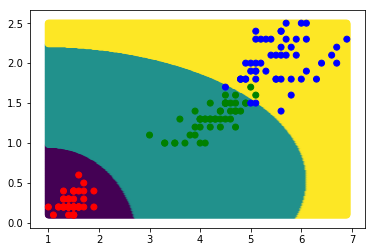

In [14]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_)
plt.scatter(iris.data[:,2], iris.data[:,3],
            c=iris.target,
            cmap=ListedColormap(['r','g', 'b']))
plt.show()

与其他分类模型比较
- sklearn.neighbors.KNeighborsClassifier
- sklearn.tree.DecisionTreeClassifier
- sklearn.linear_model.LogisticRegression

In [15]:
def draw_scatter(*args, position=1, title='', cmap=None):
    X_train, y_train, X_test, y_test = args
    ax = plt.subplot(2, 2, position)
    ax.set_title(title)
    # 先预测的数据(背景图)
    plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cmap)
    # 再画真实数据点
    plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

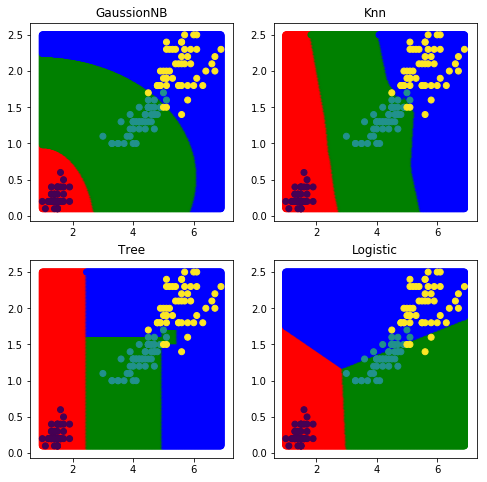

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression

cls_models = {'Knn': KNeighborsClassifier(n_neighbors=5),
              'Tree': DecisionTreeClassifier(max_depth=5),
              'Logistic': LogisticRegression(C=2)}

plt.figure(figsize=(8 , 8))

# 样本数据
X_train = iris.data[:, 2:]
y_train = iris.target

cmap = ListedColormap(['r', 'g', 'b'])
draw_scatter(X_train,
             y_train,
             X_test, y_, 
             position=1, title='GaussionNB', cmap=cmap)

position = 2
for name, model in cls_models.items():  # cls-> model
    # model = cls()  # 创建模型对象
    model.fit(X_train, y_train)
    model_y = model.predict(X_test)
    
    draw_scatter(X_train,y_train,X_test, model_y, 
                 position=position,
                 title=name, cmap=cmap)
    position += 1

### 2、多项式分布朴素贝叶斯
- sklearn.naive_bayes.MultinomialNB

多项式分布：

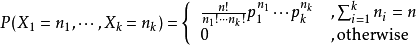

【用途】适用于文本数据（特征表示的是次数，例如某个词语的出现次数）

#### 处理文本分类
- data/SMSSpamCollection 垃圾短信
- 样本数据是短信内容
- 目标分为"spam" 和 "ham", 其中"span"为 垃圾

In [18]:
sms = pd.read_table('data/SMSSpamCollection', header=None)
sms

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [20]:
X_train = sms.iloc[:, 1] # 短信的内容
y_train = sms.iloc[:, 0]  # 分类目标, ham, span(垃圾)

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
multinomial = MultinomialNB()

multinomial.fit(X_train, y_train) 对于没有处理的文本内容是不能直接训练

In [23]:
multinomial.fit(X_train, y_train) # 无法对X的文本数据进行训练

ValueError: could not convert string to float: 'Rofl. Its true to its name'

用于将文本内容转换成词频格式的类
- sklearn.feature_extraction.text.TfidfVectorizer
    - tf = TfidfVectorizer()
    - tf.fit(samples) 训练
    - tf.transform(samples) 转换
    - tf.fit_transform(samples)训练与转换
    
[注意]  不能直接使用文本集进行训练 munb.fit(samples,target)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
tfidfVectorizer = TfidfVectorizer()  # 将文本转成词频数据格式

In [26]:
X_train_tf = tfidfVectorizer.fit_transform(X_train)

In [31]:
X_train_tf.shape

(5572, 8713)

In [32]:
X_train_tf.dtype

dtype('float64')

In [33]:
multinomial.fit(X_train_tf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

计算得分

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
split = train_test_split
X_train,X_test,y_train, y_test = split(X_train_tf,
                                       y_train,
                                       test_size=0.2)

In [36]:
multinomial.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
y_ = multinomial.predict(X_test)

In [41]:
# 【注意】r2_score 不能对目标为 文本的数据进行计算得分
multinomial.score(X_test, y_test)

0.96233183856502247

预测某一短信是否为垃圾短信

In [42]:
text = 'ree entry in 2 a wkly comp to win FA Cup final. hi, disen!'

In [57]:
test = np.array([text, 'very good!'])

In [58]:
test.shape

(2,)

In [64]:
# 【注意】直接转换文本，不要训练， 否则结果的维度会发生变化
test_tf = tfidfVectorizer.transform(test)  

In [65]:
test_tf.shape

(2, 8713)

In [66]:
multinomial.predict(test_tf)

array(['spam', 'ham'],
      dtype='<U4')

### 3、伯努利分布朴素贝叶斯

伯努利分布：

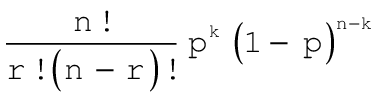

【用途】适用于伯努利分布，也适用于文本数据（此时特征表示的是是否出现，例如某个词语的出现为1，不出现为0）

绝大多数情况下表现不如多项式分布，但有的时候伯努利分布表现得要比多项式分布要好，尤其是对于小数量级的文本数据

#### 例：继续使用鸢尾花数据集

In [67]:
from sklearn.naive_bayes import BernoulliNB

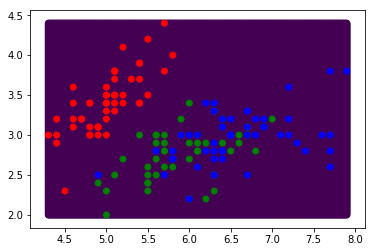

In [69]:
target = iris.target
samples = iris.data[:,:2]

ber = BernoulliNB()
ber.fit(samples,target)

xmin,xmax = samples[:,0].min(),samples[:,0].max()
ymin,ymax = samples[:,1].min(),samples[:,1].max()

x = np.linspace(xmin,xmax,300)
y = np.linspace(ymin,ymax,300)

xx,yy = np.meshgrid(x,y)
X_test = np.c_[xx.ravel(),yy.ravel()]

y_ = ber.predict(X_test)

plt.scatter(X_test[:,0],X_test[:,1],c=y_)
plt.scatter(samples[:,0],
            samples[:,1],
            c=target,cmap=cmap)

In [70]:
Series(y_).unique()

array([0])

## 三、文本分类实战

对短信进行二分类，数据为SMSSpamCollection

In [71]:
bernolli= BernoulliNB()

导包  
导入sklearn.feature_extraction.text.TfidfVectorizer用于转换字符串  
读取短信数据

#### tf.fit_transform()

- 参数必须是字符串的一维数组（比如列表或者Series）
- 返回的是一个稀疏矩阵类型的对象，行数为样本数，列数为所有出现的单词统计个数。

这里输入data[1]是Series类型，返回的是一个5572x8713 sparse matrix 
其中5572是data[1]

训练数据

In [75]:
samples = sms[1]
target = sms[0]

X_train,X_test, y_train, y_test = split(samples, target)

tf = TfidfVectorizer()
X_train_tf = tf.fit_transform(X_train)

In [76]:
bernolli.fit(X_train_tf, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [79]:
X_test_tf = tf.transform(X_test)
bernolli.score(X_test_tf, y_test)

0.9712849964106246

预测数据，使用tf.transform(['xx'])进行转换生成测试数据

In [87]:
bernolli.predict(tf.transform(['HI, You win $100!',
                              'Thanks for your subscription to Ringtone UK your mobile will be charged',
                              'Please confirm by replying YES or NO.']))

array(['ham', 'spam', 'ham'],
      dtype='<U4')

## 四、作业

#### 对email进行二分类，两种邮件分别在ham和spam目录下

In [ ]:
pd.read_csv('data/email/spam/1.txt')

In [ ]:
def load_message(categoray):
    samples = []
    target = []
    for i in range(1,26):
#         utf-8 gbk 加入errors可以避免错误
#         errors {strict -> raise ValueError, ignore}
#         r+b 和 w+b 的区别？
        with open('data/email/%s/%d.txt'%(categoray,i),'r',
                  errors = 'ignore') as fp:
            data = fp.read()
            samples.append(data)
            target.append(categoray)
    return (samples,target)

In [ ]:
train1,target1 = load_message('spam')
train2,target2 = load_message('ham')

In [ ]:
train = train1 + train2
target = target1 + target2

In [ ]:
tf = TfidfVectorizer()
tf_train = tf.fit_transform(train)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(tf_train,target,test_size=0.3)

In [ ]:
munb = MultinomialNB()
bernb = BernoulliNB()

munb.fit(X_train,y_train)
bernb.fit(X_train,y_train)

print("MultinomialNB score is %f"%munb.score(X_test,y_test))
print("BernoulliNB score is %f"%bernb.score(X_test,y_test))